In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from simulation_framework.bernoulli_trial import BernoulliTrial
from simulation_framework.simulation_framework import run_sim
from simulation_framework.plot_functions import format_results, summarize_results, plot_accuracy, plot_performance, plot_cumulative_reward
from algorithms.epsilon_greedy import EpsilonGreedy
from algorithms.epsilon_greedy_annealing import EpsilonGreedyAnnealing
from algorithms.hedge import Hedge
from algorithms.softmax import Softmax
from algorithms.softmax_annealing import SoftmaxAnnealing
from algorithms.ucb1 import UCB1
from algorithms.ucb2 import UCB2
from algorithms.exp3 import EXP3
from algorithms.thompson_sampling import ThompsonSampling
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
probabilities = [.1, .1, .1, .1, .9]

In [3]:
n_arms = len(probabilities)
random.shuffle(probabilities)
arms = [BernoulliTrial(mu) for mu in probabilities]
print('Best arm is {}'.format(np.argmax(probabilities)))

Best arm is 0


In [4]:
horizon = 250
number_of_simulations = 5000

# Epsilon Greedy

In [5]:
columns = ['epsilon', 'sim_num', 'trial', 'chosen_arm', 'reward', 'cumulative_reward']
columns.extend(['arm_{}'.format(arm) for arm in range(len(arms))])
columns.extend(['arm_{}_cumulative'.format(arm) for arm in range(len(arms))])
df = pd.DataFrame(columns=columns, dtype=float)

for epsilon in [.1, .2, .3, .4, .5]:
    algorithm = EpsilonGreedy(epsilon, n_arms)
    results = run_sim(algorithm, arms, horizon, number_of_simulations)
    new_rows = format_results(results, arms)
    new_rows['epsilon'] = epsilon
    df = df.append(new_rows, ignore_index=True, sort=False)
df_ave = summarize_results(df, arms, ['epsilon'])

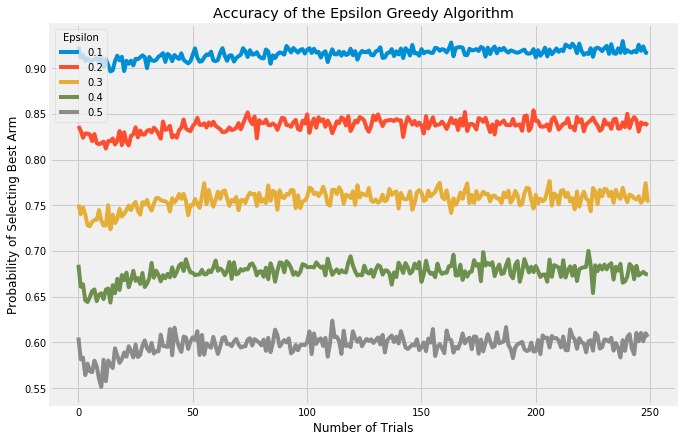

In [6]:
plot_accuracy(df_ave, probabilities)
# plt.figure(figsize=(10, 7))
# for epsilon in df_ave['epsilon'].unique():
#     plt.plot(df_ave[df_ave['epsilon'] == epsilon]['trial'],
#              df_ave[df_ave['epsilon'] == epsilon]['arm_{}'.format(np.argmax(probabilities))],
#              label=epsilon)
# plt.legend(title='Epsilon')
# plt.xlabel('Number of Trials')
# plt.ylabel('Probability of Selecting Best Arm')
# plt.title('Accuracy of the Epsilon Greedy Algorithm')
# plt.show()

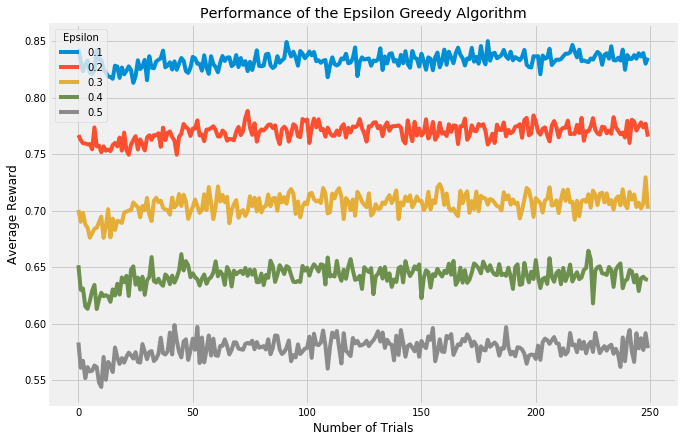

In [7]:
plot_performance(df_ave)
# plt.figure(figsize=(10, 7))
# for epsilon in df_ave['epsilon'].unique():
#     plt.plot(df_ave[df_ave['epsilon'] == epsilon]['trial'],
#              df_ave[df_ave['epsilon'] == epsilon]['reward'],
#              label=epsilon)
# plt.legend(title='Epsilon')
# plt.xlabel('Number of Trials')
# plt.ylabel('Average Reward')
# plt.title('Performance of the Epsilon Greedy Algorithm')
# plt.show()

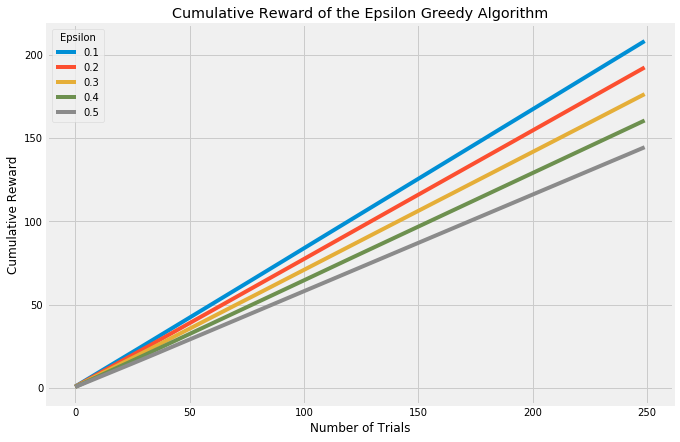

In [8]:
plot_cumulative_reward(df_ave)
# plt.figure(figsize=(10, 7))
# for epsilon in df_ave['epsilon'].unique():
#     plt.plot(df_ave[df_ave['epsilon'] == epsilon]['trial'],
#              df_ave[df_ave['epsilon'] == epsilon]['cumulative_reward'],
#              label=epsilon)
# plt.legend(title='Epsilon')
# plt.xlabel('Number of Trials')
# plt.ylabel('Cumulative Reward')
# plt.title('Cumulative Reward of the Epsilon Greedy Algorithm')
# plt.show()

# Hedge

In [9]:
columns = ['temperature', 'sim_num', 'trial', 'chosen_arm', 'reward', 'cumulative_reward']
columns.extend(['arm_{}'.format(arm) for arm in range(len(arms))])
columns.extend(['arm_{}_cumulative'.format(arm) for arm in range(len(arms))])
df = pd.DataFrame(columns=columns, dtype=float)

for temperature in [.1, .2, .3, .4, .5]:
    algorithm = Hedge(temperature, n_arms)
    results = run_sim(algorithm, arms, horizon, number_of_simulations)
    new_rows = format_results(results, arms)
    new_rows['temperature'] = temperature
    df = df.append(new_rows, ignore_index=True, sort=False)
df_ave = summarize_results(df, arms, ['temperature'])

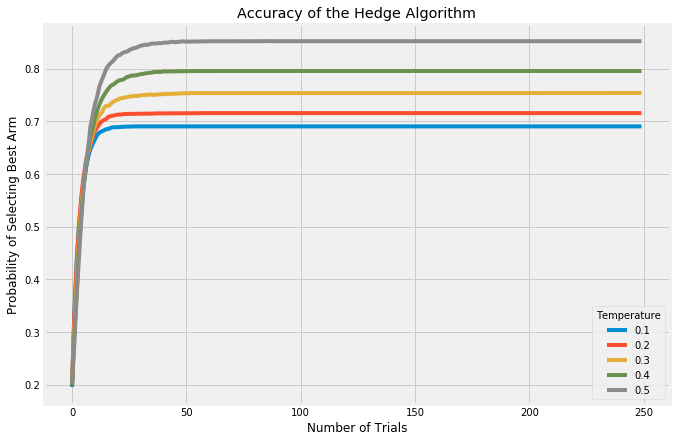

In [10]:
plt.figure(figsize=(10, 7))
for temperature in df_ave['temperature'].unique():
    plt.plot(df_ave[df_ave['temperature'] == temperature]['trial'],
             df_ave[df_ave['temperature'] == temperature]['arm_{}'.format(np.argmax(probabilities))],
             label=temperature)
plt.legend(title='Temperature')
plt.xlabel('Number of Trials')
plt.ylabel('Probability of Selecting Best Arm')
plt.title('Accuracy of the Hedge Algorithm')
plt.show()

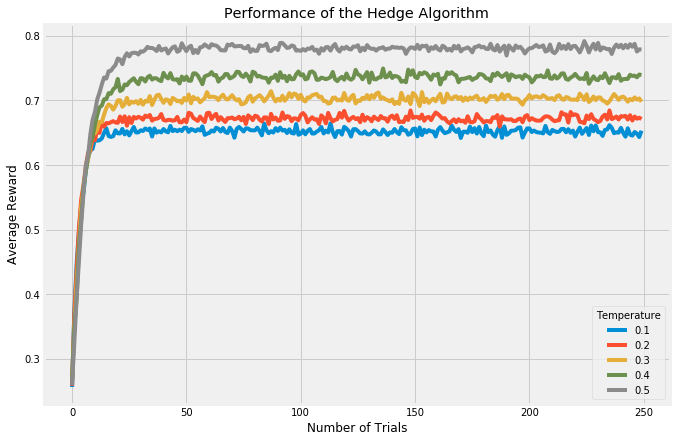

In [11]:
plt.figure(figsize=(10, 7))
for temperature in df_ave['temperature'].unique():
    plt.plot(df_ave[df_ave['temperature'] == temperature]['trial'],
             df_ave[df_ave['temperature'] == temperature]['reward'],
             label=temperature)
plt.legend(title='Temperature')
plt.xlabel('Number of Trials')
plt.ylabel('Average Reward')
plt.title('Performance of the Hedge Algorithm')
plt.show()

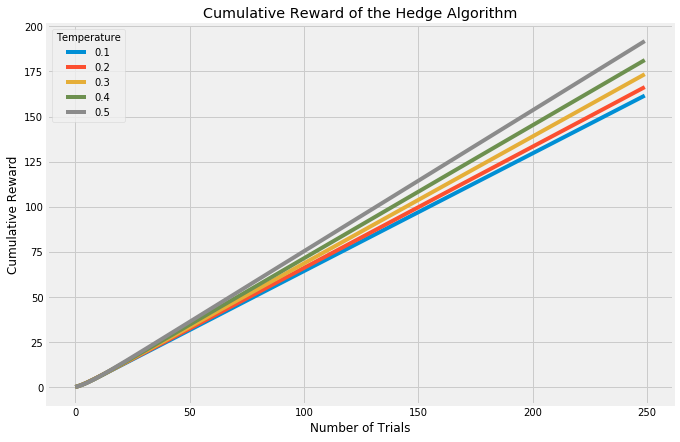

In [12]:
plt.figure(figsize=(10, 7))
for temperature in df_ave['temperature'].unique():
    plt.plot(df_ave[df_ave['temperature'] == temperature]['trial'],
             df_ave[df_ave['temperature'] == temperature]['cumulative_reward'],
             label=temperature)
plt.legend(title='Temperature')
plt.xlabel('Number of Trials')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward of the Hedge Algorithm')
plt.show()

# Softmax

In [13]:
columns = ['temperature', 'sim_num', 'trial', 'chosen_arm', 'reward', 'cumulative_reward']
columns.extend(['arm_{}'.format(arm) for arm in range(len(arms))])
columns.extend(['arm_{}_cumulative'.format(arm) for arm in range(len(arms))])
df = pd.DataFrame(columns=columns, dtype=float)

for temperature in [.1, .2, .3, .4, .5]:
    algorithm = Softmax(temperature, n_arms)
    results = run_sim(algorithm, arms, horizon, number_of_simulations)
    new_rows = format_results(results, arms)
    new_rows['temperature'] = temperature
    df = df.append(new_rows, ignore_index=True, sort=False)
df_ave = summarize_results(df, arms, ['temperature'])

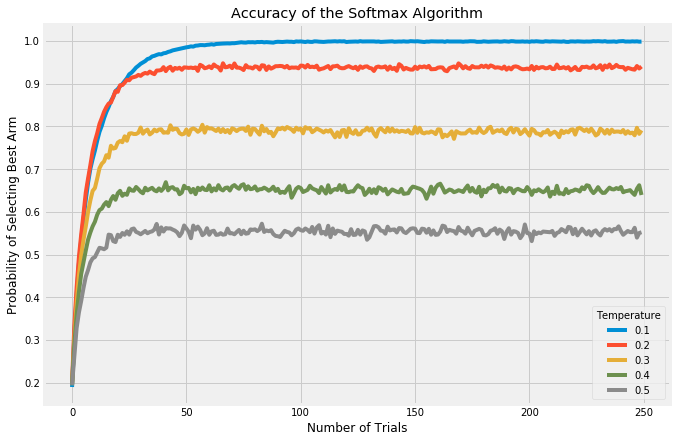

In [14]:
plt.figure(figsize=(10, 7))
for temperature in df_ave['temperature'].unique():
    plt.plot(df_ave[df_ave['temperature'] == temperature]['trial'],
             df_ave[df_ave['temperature'] == temperature]['arm_{}'.format(np.argmax(probabilities))],
             label=temperature)
plt.legend(title='Temperature')
plt.xlabel('Number of Trials')
plt.ylabel('Probability of Selecting Best Arm')
plt.title('Accuracy of the Softmax Algorithm')
plt.show()

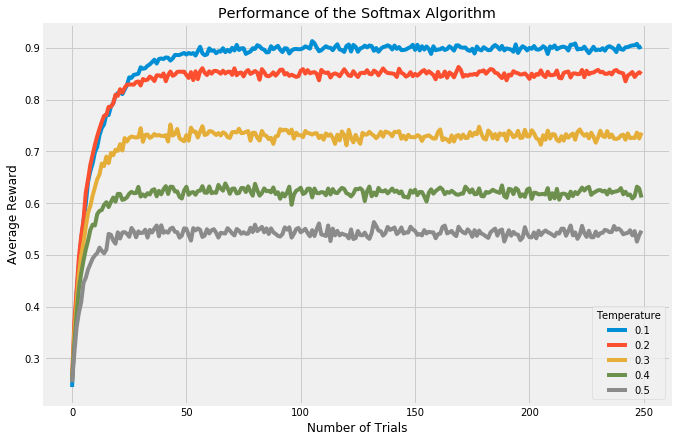

In [15]:
plt.figure(figsize=(10, 7))
for temperature in df_ave['temperature'].unique():
    plt.plot(df_ave[df_ave['temperature'] == temperature]['trial'],
             df_ave[df_ave['temperature'] == temperature]['reward'],
             label=temperature)
plt.legend(title='Temperature')
plt.xlabel('Number of Trials')
plt.ylabel('Average Reward')
plt.title('Performance of the Softmax Algorithm')
plt.show()

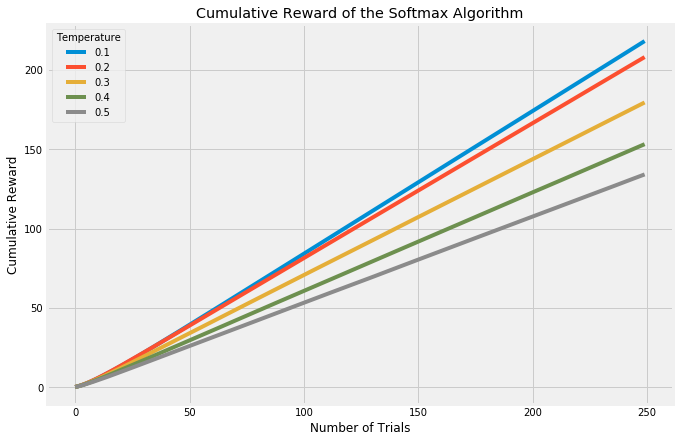

In [16]:
plt.figure(figsize=(10, 7))
for temperature in df_ave['temperature'].unique():
    plt.plot(df_ave[df_ave['temperature'] == temperature]['trial'],
             df_ave[df_ave['temperature'] == temperature]['cumulative_reward'],
             label=temperature)
plt.legend(title='Temperature')
plt.xlabel('Number of Trials')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward of the Softmax Algorithm')
plt.show()

# Annealing Softmax

In [17]:
columns = ['temperature', 'sim_num', 'trial', 'chosen_arm', 'reward', 'cumulative_reward']
columns.extend(['arm_{}'.format(arm) for arm in range(len(arms))])
columns.extend(['arm_{}_cumulative'.format(arm) for arm in range(len(arms))])
df = pd.DataFrame(columns=columns, dtype=float)

for annealing_factor in [.000000000000001, .0000001, 10, 100000, 10000000000]:
    algorithm = SoftmaxAnnealing(n_arms, annealing_factor)
    results = run_sim(algorithm, arms, horizon, number_of_simulations)
    new_rows = format_results(results, arms)
    new_rows['annealing_factor'] = annealing_factor
    df = df.append(new_rows, ignore_index=True, sort=False)
df_ave = summarize_results(df, arms, ['annealing_factor'])

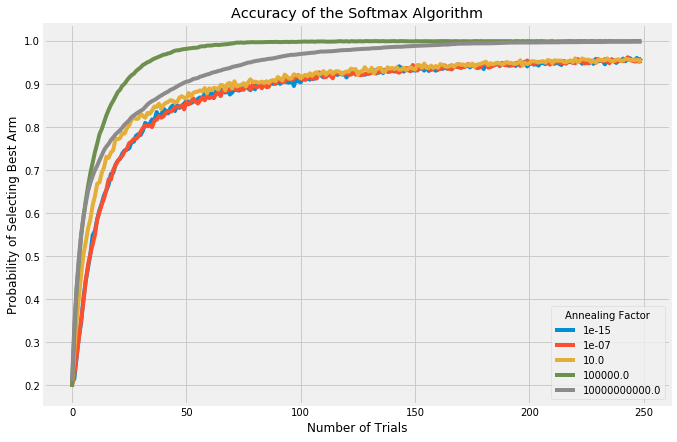

In [18]:
plt.figure(figsize=(10, 7))
for annealing_factor in df_ave['annealing_factor'].unique():
    plt.plot(df_ave[df_ave['annealing_factor'] == annealing_factor]['trial'],
             df_ave[df_ave['annealing_factor'] == annealing_factor]['arm_{}'.format(np.argmax(probabilities))],
             label=annealing_factor)
plt.legend(title='Annealing Factor')
plt.xlabel('Number of Trials')
plt.ylabel('Probability of Selecting Best Arm')
plt.title('Accuracy of the Softmax Algorithm')
plt.show()

# Upper Confidence Bound v1

In [19]:
columns = ['epsilon', 'sim_num', 'trial', 'chosen_arm', 'reward', 'cumulative_reward']
columns.extend(['arm_{}'.format(arm) for arm in range(len(arms))])
columns.extend(['arm_{}_cumulative'.format(arm) for arm in range(len(arms))])
df = pd.DataFrame(columns=columns, dtype=float)


algorithm = UCB1(n_arms)
results = run_sim(algorithm, arms, horizon, number_of_simulations)
new_rows = format_results(results, arms)
df = df.append(new_rows, ignore_index=True, sort=False)

df_ave = summarize_results(df, arms, [])

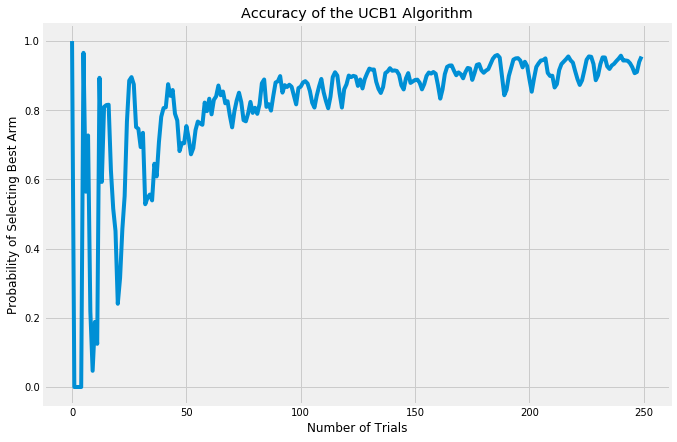

In [20]:
plt.figure(figsize=(10, 7))
plt.plot(df_ave['trial'],
         df_ave['arm_{}'.format(np.argmax(probabilities))])
plt.xlabel('Number of Trials')
plt.ylabel('Probability of Selecting Best Arm')
plt.title('Accuracy of the UCB1 Algorithm')
plt.show()

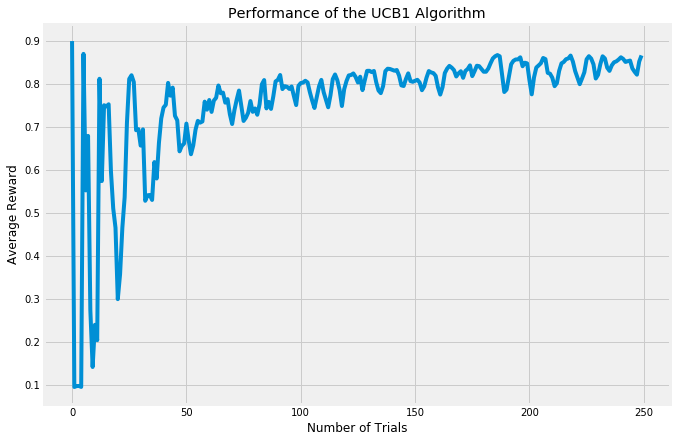

In [21]:
plt.figure(figsize=(10, 7))
plt.plot(df_ave['trial'],
         df_ave['reward'])
plt.xlabel('Number of Trials')
plt.ylabel('Average Reward')
plt.title('Performance of the UCB1 Algorithm')
plt.show()

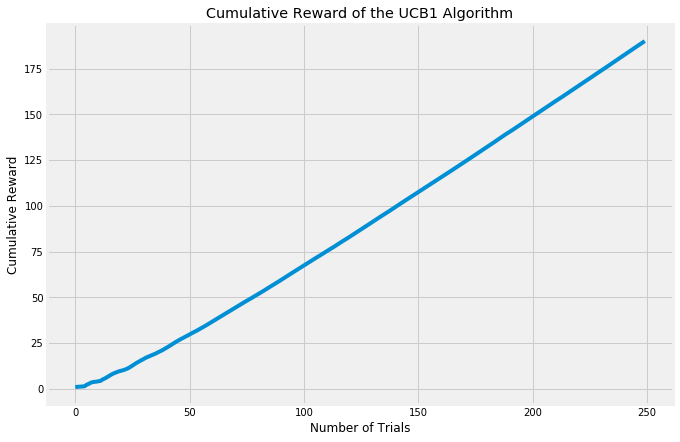

In [22]:
plt.figure(figsize=(10, 7))
plt.plot(df_ave['trial'],
         df_ave['cumulative_reward'])
plt.xlabel('Number of Trials')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward of the UCB1 Algorithm')
plt.show()

# Upper Confidence Bound v2

In [23]:
columns = ['alpha', 'sim_num', 'trial', 'chosen_arm', 'reward', 'cumulative_reward']
columns.extend(['arm_{}'.format(arm) for arm in range(len(arms))])
columns.extend(['arm_{}_cumulative'.format(arm) for arm in range(len(arms))])
df = pd.DataFrame(columns=columns, dtype=float)

for alpha in [.1, .2, .3, .4, .5]:
    algorithm = UCB2(alpha, n_arms)
    results = run_sim(algorithm, arms, horizon, number_of_simulations)
    new_rows = format_results(results, arms)
    new_rows['alpha'] = alpha
    df = df.append(new_rows, ignore_index=True, sort=False)
df_ave = summarize_results(df, arms, ['alpha'])

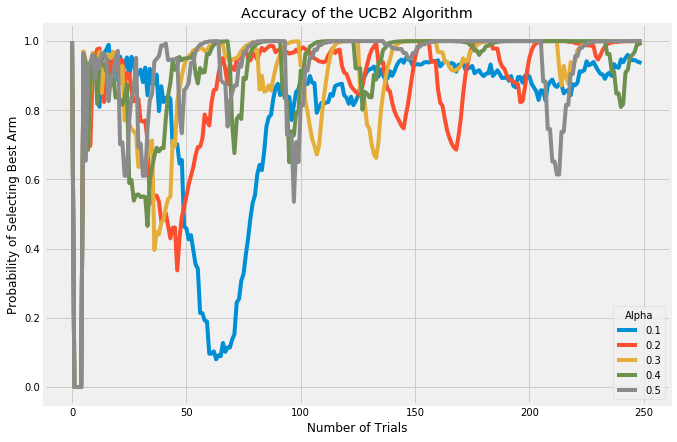

In [24]:
plt.figure(figsize=(10, 7))
for alpha in df_ave['alpha'].unique():
    plt.plot(df_ave[df_ave['alpha'] == alpha]['trial'],
             df_ave[df_ave['alpha'] == alpha]['arm_{}'.format(np.argmax(probabilities))],
             label=alpha)
plt.legend(title='Alpha')
plt.xlabel('Number of Trials')
plt.ylabel('Probability of Selecting Best Arm')
plt.title('Accuracy of the UCB2 Algorithm')
plt.show()

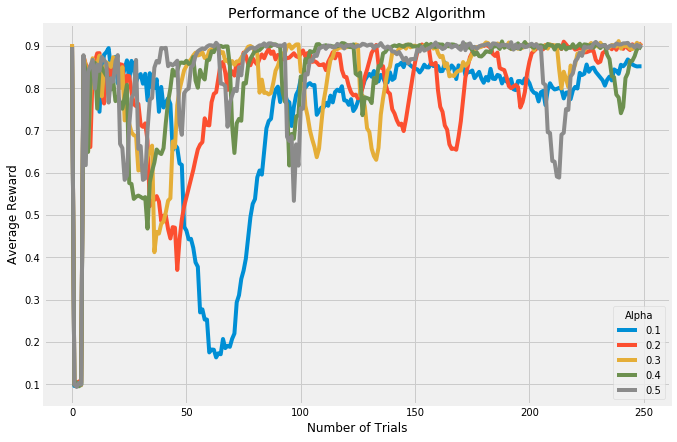

In [25]:
plt.figure(figsize=(10, 7))
for alpha in df_ave['alpha'].unique():
    plt.plot(df_ave[df_ave['alpha'] == alpha]['trial'],
             df_ave[df_ave['alpha'] == alpha]['reward'],
             label=alpha)
plt.legend(title='Alpha')
plt.xlabel('Number of Trials')
plt.ylabel('Average Reward')
plt.title('Performance of the UCB2 Algorithm')
plt.show()

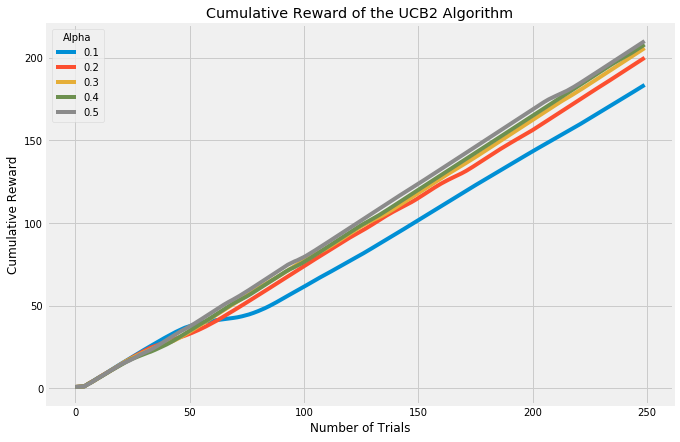

In [26]:
plt.figure(figsize=(10, 7))
for alpha in df_ave['alpha'].unique():
    plt.plot(df_ave[df_ave['alpha'] == alpha]['trial'],
             df_ave[df_ave['alpha'] == alpha]['cumulative_reward'],
             label=alpha)
plt.legend(title='Alpha')
plt.xlabel('Number of Trials')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward of the UCB2 Algorithm')
plt.show()

# Thompson Sampling

In [27]:
columns = ['epsilon', 'sim_num', 'trial', 'chosen_arm', 'reward', 'cumulative_reward']
columns.extend(['arm_{}'.format(arm) for arm in range(len(arms))])
columns.extend(['arm_{}_cumulative'.format(arm) for arm in range(len(arms))])
df = pd.DataFrame(columns=columns, dtype=float)

algorithm = ThompsonSampling(n_arms)
results = run_sim(algorithm, arms, horizon, number_of_simulations)
new_rows = format_results(results, arms)
df = df.append(new_rows, ignore_index=True, sort=False)

df_ave = summarize_results(df, arms, [])

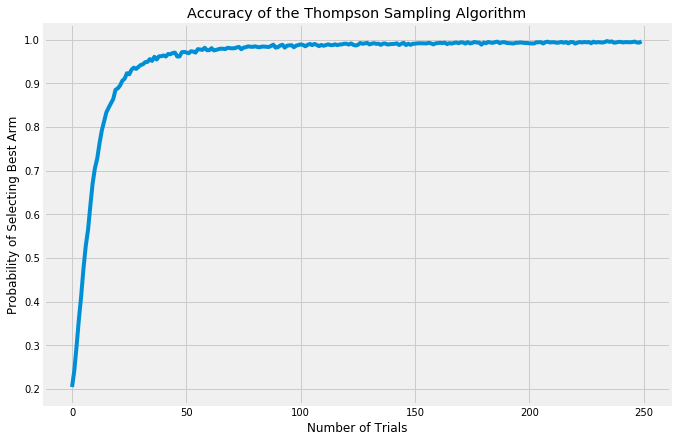

In [28]:
plt.figure(figsize=(10, 7))
plt.plot(df_ave['trial'],
         df_ave['arm_{}'.format(np.argmax(probabilities))])
plt.xlabel('Number of Trials')
plt.ylabel('Probability of Selecting Best Arm')
plt.title('Accuracy of the Thompson Sampling Algorithm')
plt.show()

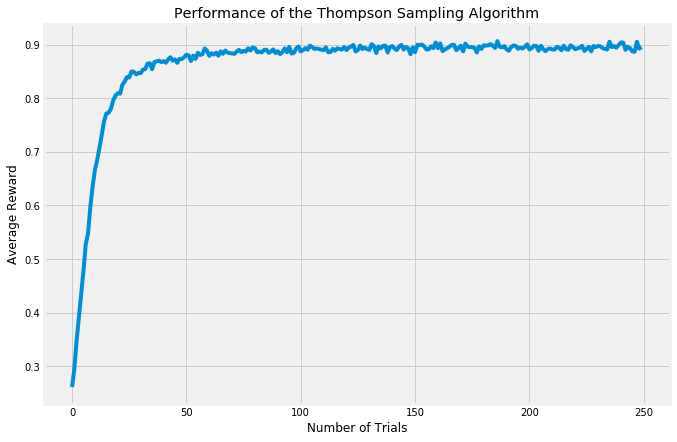

In [29]:
plt.figure(figsize=(10, 7))
plt.plot(df_ave['trial'],
         df_ave['reward'])
plt.xlabel('Number of Trials')
plt.ylabel('Average Reward')
plt.title('Performance of the Thompson Sampling Algorithm')
plt.show()

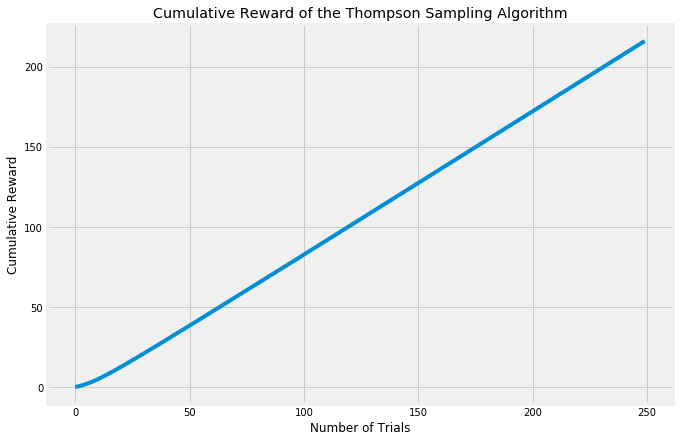

In [30]:
plt.figure(figsize=(10, 7))
plt.plot(df_ave['trial'],
         df_ave['cumulative_reward'])
plt.xlabel('Number of Trials')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward of the Thompson Sampling Algorithm')
plt.show()

# EXP3

In [31]:
columns = ['alpha', 'sim_num', 'trial', 'chosen_arm', 'reward', 'cumulative_reward']
columns.extend(['arm_{}'.format(arm) for arm in range(len(arms))])
columns.extend(['arm_{}_cumulative'.format(arm) for arm in range(len(arms))])
df = pd.DataFrame(columns=columns, dtype=float)

for gamma in [.1, .2, .3, .4, .5]:
    algorithm = EXP3(gamma, n_arms)
    results = run_sim(algorithm, arms, horizon, number_of_simulations)
    new_rows = format_results(results, arms)
    new_rows['gamma'] = gamma
    df = df.append(new_rows, ignore_index=True, sort=False)
df_ave = summarize_results(df, arms, ['gamma'])

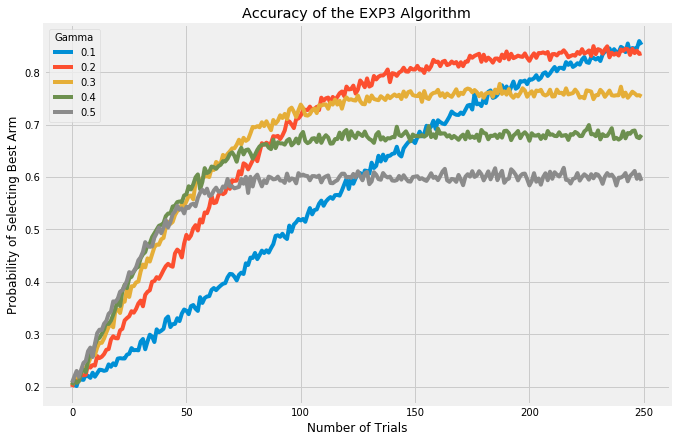

In [32]:
plt.figure(figsize=(10, 7))
for gamma in df_ave['gamma'].unique():
    plt.plot(df_ave[df_ave['gamma'] == gamma]['trial'],
             df_ave[df_ave['gamma'] == gamma]['arm_{}'.format(np.argmax(probabilities))],
             label=gamma)
plt.legend(title='Gamma')
plt.xlabel('Number of Trials')
plt.ylabel('Probability of Selecting Best Arm')
plt.title('Accuracy of the EXP3 Algorithm')
plt.show()

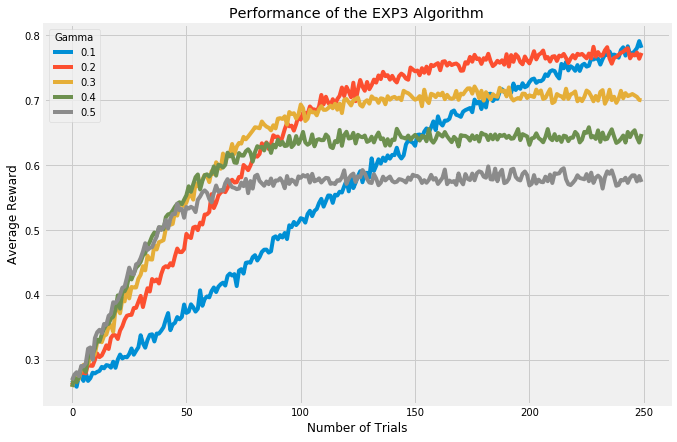

In [33]:
plt.figure(figsize=(10, 7))
for gamma in df_ave['gamma'].unique():
    plt.plot(df_ave[df_ave['gamma'] == gamma]['trial'],
             df_ave[df_ave['gamma'] == gamma]['reward'],
             label=gamma)
plt.legend(title='Gamma')
plt.xlabel('Number of Trials')
plt.ylabel('Average Reward')
plt.title('Performance of the EXP3 Algorithm')
plt.show()

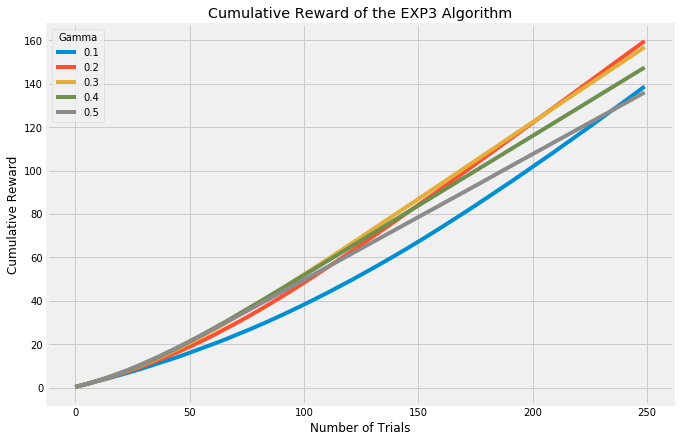

In [34]:
plt.figure(figsize=(10, 7))
for gamma in df_ave['gamma'].unique():
    plt.plot(df_ave[df_ave['gamma'] == gamma]['trial'],
             df_ave[df_ave['gamma'] == gamma]['cumulative_reward'],
             label=gamma)
plt.legend(title='Gamma')
plt.xlabel('Number of Trials')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward of the EXP3 Algorithm')
plt.show()

# Comparing Arms

In [6]:
from scipy import stats

In [105]:
probabilities = [.1, .5, .6, .25, .9]
probabilities = [.01, .009, .0105, .011, .015]

In [106]:
n_arms = len(probabilities)
random.shuffle(probabilities)
arms = [BernoulliTrial(mu) for mu in probabilities]
print('Best arm is {}'.format(np.argmax(probabilities)))

Best arm is 4


In [107]:
horizon = 250
number_of_simulations = 5000

In [108]:
epsilon = .5
algorithm = EpsilonGreedy(epsilon, n_arms)
results = run_sim(algorithm, arms, horizon, number_of_simulations)
df = format_results(results, arms)

In [109]:
confidence_level = .95
alpha = (1 - confidence_level) / 2

In [110]:
def lookup_t(dof, alpha=alpha):
    return stats.t.ppf(1 - alpha, dof)

def build_confidence_interval(df, confidence_level=.95):
    confidence_level = confidence_level
    alpha = (1 - confidence_level) / 2
    df['dof'] = df.index
    df['t_stat'] = df['dof'].apply(lookup_t)
    df['std'] = df['reward'].expanding(2).std()
    df['mean'] = df['reward'].expanding(2).mean()
    df['confidence_interval'] = df['t_stat'] * df['std'] / np.sqrt(df['dof'] + 1)
    df['lower_bound'] = df['mean'] - df['confidence_interval']
    df['upper_bound'] = df['mean'] + df['confidence_interval']
    return df

In [111]:
arm_results = {}

for arm in range(len(arms)):
    arm_results[arm] = (build_confidence_interval(df[df['arm_{}'.format(arm)] == 1].
                                                  groupby('trial')[['reward', 'cumulative_reward']].
                                                  mean().reset_index()))

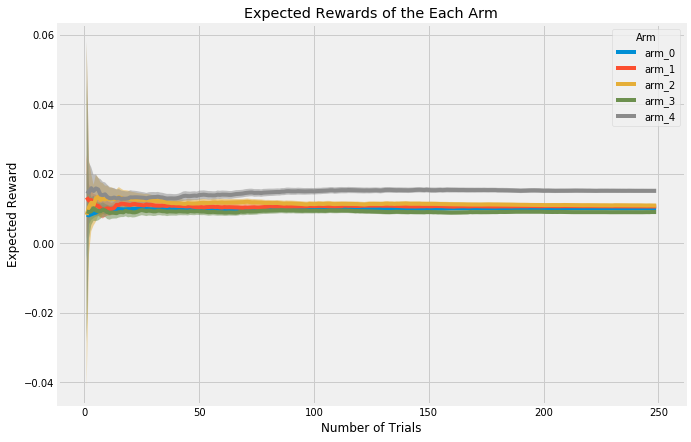

In [114]:
plt.figure(figsize=(10, 7))
# plt.xlim(left=5, right=250)
# plt.ylim(bottom=-.02, top=.04)
for arm in range(len(arms)):
    df = arm_results[arm]
    x = df.index
    y = df['mean']
    error = df['confidence_interval']
    plt.plot(x, y, label='arm_{}'.format(arm))
    plt.fill_between(x, y - error, y + error, alpha=.5)
plt.legend(title='Arm')
plt.xlabel('Number of Trials')
plt.ylabel('Expected Reward')
plt.title('Expected Rewards of the Each Arm')
plt.show()